### Problem Statement:

You have a telecom firm which has collected data of all its customers. The main types of attributes are:

- Demographics (age, gender etc.)
- Services availed (internet packs purchased, special offers taken etc.)
- Expenses (amount of recharge done per month etc.)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("max.columns", None)

### Loading the data

In [3]:
churn_data = pd.read_csv("/Users/manmitha_malineni/Downloads/churn_data.csv")
internet_data = pd.read_csv("/Users/manmitha_malineni/Downloads/internet_data.csv")
customer_data = pd.read_csv("/Users/manmitha_malineni/Downloads/customer_data.csv")

### Merging Data Sources

In [4]:
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
temp = churn_data.merge(internet_data, how = "inner", on = "customerID")
merged_data = temp.merge(customer_data, how = "inner", on = "customerID")

### Inspecting DataSet

In [6]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [7]:
merged_data.shape

(7043, 21)

In [8]:
merged_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


There are no missing values in the data

### Variable Transformation

In [10]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [11]:
merged_data["TotalCharges"] = pd.to_numeric(merged_data["TotalCharges"], errors="coerce" )

### Missing values

In [12]:
merged_data.isnull().sum().sort_values(ascending = False)

TotalCharges        11
customerID           0
OnlineSecurity       0
Partner              0
SeniorCitizen        0
gender               0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
InternetService      0
tenure               0
MultipleLines        0
Churn                0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
PhoneService         0
Dependents           0
dtype: int64

Since the number of missing values in the column are less, dropping the rows

In [13]:
merged_data = merged_data[ ~ merged_data["TotalCharges"].isnull()]

In [14]:
merged_data.shape

(7032, 21)

### EDA

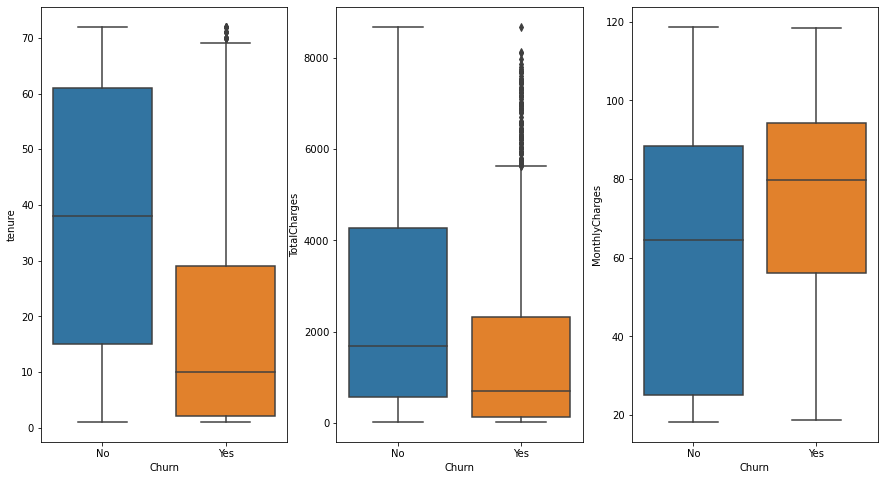

In [15]:
numeric_cols = ["tenure", "TotalCharges", "MonthlyCharges"]
#sns.pairplot(merged_data, x_vars= numeric_cols, y_vars= ["Churn"], kind = "box")
index = 1
plt.figure(figsize=(15,8))
for column in numeric_cols:
    plt.subplot(1,3, index)
    sns.boxplot(merged_data["Churn"], merged_data[column])
    index+=1
plt.show()

In [16]:
### checking for the distribution of columns.
cat_columns = list(merged_data.columns[(merged_data.dtypes == object)])
cat_columns.remove("customerID")
cat_columns

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'Partner',
 'Dependents']

In [17]:
merged_data[cat_columns]

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents
0,No,Month-to-month,Yes,Electronic check,No,No phone service,DSL,No,Yes,No,No,No,No,Female,Yes,No
1,Yes,One year,No,Mailed check,No,No,DSL,Yes,No,Yes,No,No,No,Male,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,No,No
3,No,One year,No,Bank transfer (automatic),No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,No,Fiber optic,No,No,No,No,No,No,Female,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,One year,Yes,Mailed check,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,Yes,Yes
7039,Yes,One year,Yes,Credit card (automatic),No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,Yes,Yes
7040,No,Month-to-month,Yes,Electronic check,No,No phone service,DSL,Yes,No,No,No,No,No,Female,Yes,Yes
7041,Yes,Month-to-month,Yes,Mailed check,Yes,Yes,Fiber optic,No,No,No,No,No,No,Male,Yes,No


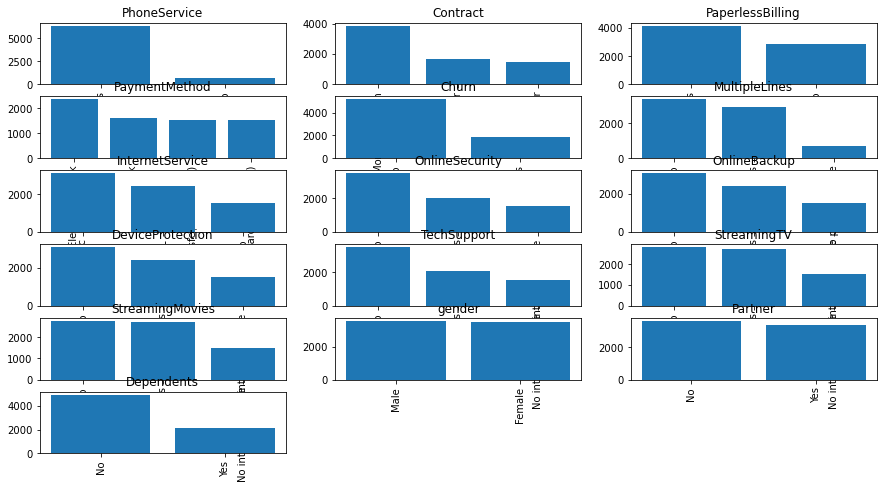

In [18]:
fig = plt.figure(figsize=(15,12))
index = 1
for column in cat_columns:
    plt.subplot(9,3, index)
    index+=1 
    temp = merged_data[column].value_counts()
    plt.bar(temp.index, temp)
    plt.title(column)
    plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

In [19]:
### Checking for data imbalance
merged_data["Churn"].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

### One-Hot encoding.


In [20]:
binary_cols = ["PhoneService", "PaperlessBilling", "Churn", "Partner", "Dependents"]

In [21]:
merged_data[binary_cols] = merged_data[binary_cols].apply(lambda x: x.map({"Yes": 1, "No": 0}))
merged_data["gender"]= merged_data["gender"].map({"Male": 1, "Female": 0})

In [22]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,Fiber optic,No,No,No,No,No,No,0,0,0,0


In [23]:
columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
               "TechSupport", "StreamingTV", "StreamingMovies"]
dummies = pd.get_dummies(merged_data[columns])
merged_data = pd.concat([merged_data, dummies], axis = 1)
merged_data.drop(["OnlineSecurity_No internet service", "OnlineBackup_No internet service", 
                  "DeviceProtection_No internet service", "TechSupport_No internet service", 
                  "StreamingTV_No internet service", "StreamingMovies_No internet service"], 
                 axis = 1, inplace = True)
merged_data.drop(columns, axis = 1, inplace = True)

In [24]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,No,DSL,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,DSL,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,Fiber optic,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [25]:
object_cols = ["Contract", "PaymentMethod", "MultipleLines", "InternetService"]
dummies = pd.get_dummies(merged_data[object_cols])
merged_data = pd.concat([merged_data, dummies], axis = 1)

merged_data.drop(object_cols, axis = 1,inplace = True)

In [26]:
merged_data["PhoneService"].value_counts()

1    6352
0     680
Name: PhoneService, dtype: int64

In [27]:
merged_data["MultipleLines_No phone service"].value_counts()

0    6352
1     680
Name: MultipleLines_No phone service, dtype: int64

The counts of values in Phone Service and multiple lines are matching. Hence, dropping the column

In [28]:
merged_data.drop(["MultipleLines_No phone service"], axis = 1, inplace = True)

In [29]:
merged_data.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0


### Test train split

In [30]:
X_train, X_test, y_train, y_test = train_test_split( merged_data.drop(["customerID", "Churn"], axis = 1), 
                                                    merged_data["Churn"], 
                                                    test_size = 0.25,
                                                   random_state = 42)

In [31]:
X_train.shape, X_test.shape

((5274, 33), (1758, 33))

In [32]:
y_train.shape, y_test.shape

((5274,), (1758,))

### Scaling the variables

In [33]:
to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])

In [34]:
merged_data

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0


In [35]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3166,-0.748175,1,0,-0.526380,-0.712154,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
4333,-0.056016,1,1,0.858262,0.290305,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1927,0.595428,1,1,1.415436,1.259067,1,0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0
2315,0.106845,1,1,0.291139,0.171422,1,0,1,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0
858,1.369017,1,0,0.806856,1.604076,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,-1.196043,1,0,-0.473316,-0.945428,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
5199,0.758289,1,1,1.553071,1.517630,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
5235,-0.951752,1,1,0.546510,-0.659030,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
5399,0.717573,1,0,-1.489826,-0.568491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


### Model Building

In [36]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

In [37]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                            GLM   Df Residuals:                     5250
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2167.8
Date:                Tue, 16 Nov 2021   Deviance:                       4335.5
Time:                        22:03:59   Pearson chi2:                 6.00e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0561      0.823     -2.500      0.012      -3.668      -0.444
tenure                                     -1.5808      0.182     -8.706      0.000      -1.937      -1.225
PhoneService                                0.3932      0.567      0.694      0.488      -0.718       1.504
PaperlessBilling                            0.2327      0.086      2.706      0.007       0.064       0.401
MonthlyCharges                             -1.4994      1.122     -1.337      0.181      -3.698       0.699
TotalCharges                                0.8268      0.188      4.394      0.000       0.458       1.196
gender                                     -0.0290      0.075     -0.385      0.700      -0.176       0.118
SeniorCitizen                               0.2459      0.098      2.508      0.012       0.054       0.438
Partner                                     0.0954      0.091      1.052      0.293      -0.082       0.273
Dependents                                 -0.2395      0.105     -2.279      0.023      -0.445      -0.033
OnlineSecurity_No                           0.2784      0.073      3.820      0.000       0.136       0.421
OnlineSecurity_Yes                          0.0897      0.244      0.367      0.714      -0.389       0.569
OnlineBackup_No                             0.1288      0.070      1.841      0.066      -0.008       0.266
OnlineBackup_Yes                            0.2393      0.244      0.982      0.326      -0.238       0.717
DeviceProtection_No                         0.0609      0.072      0.848      0.396      -0.080       0.202
DeviceProtection_Yes                        0.3072      0.243      1.264      0.206      -0.169       0.784
TechSupport_No                              0.2533      0.073      3.482      0.000       0.111       0.396
TechSupport_Yes                             0.1148      0.245      0.468      0.640      -0.366       0.596
StreamingTV_No                             -0.1595      0.061     -2.601      0.009      -0.280      -0.039
StreamingTV_Yes                             0.5275      0.335      1.576      0.115      -0.129       1.184
StreamingMovies_No                         -0.1827      0.062     -2.948      0.003      -0.304      -0.061
StreamingMovies_Yes                         0.5508      0.336      1.641      0.101      -0.107       1.209
Contract_Month-to-month                     0.0335      0.286      0.117      0.907      -0.527       0.595
Contract_One year                          -0.7486      0.287     -2.611      0.009      -1.311      -0.187
Contract_Two year                          -1.3410      0.306     -4.376      0.000      -1.942      -0.740
PaymentMethod_Bank transfer (automatic)    -0.5252      0.2

There appears to be a few features which are redundant in the model.<br> 
Select the top 15 features using RFE

#### Feature Selection using RFE

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 6),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender', False, 15),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 5),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 13),
 ('OnlineBackup_No', False, 7),
 ('OnlineBackup_Yes', False, 10),
 ('DeviceProtection_No', False, 3),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 14),
 ('StreamingTV_No', False, 18),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 17),
 ('StreamingMovies_Yes', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 12),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 16),
 ('PaymentMethod_Credit card (automatic)', False, 9),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 11),
 ('MultipleLines_No', True, 1),
 ('Multip

#### Model Building using features selected by RFE.

In [40]:
rfe_cols = X_train.columns[rfe.support_]
X_train = X_train[rfe_cols]

In [41]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                            GLM   Df Residuals:                     5259
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2175.8
Date:                Tue, 16 Nov 2021   Deviance:                       4351.6
Time:                        22:03:59   Pearson chi2:                 5.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1914      0.118    -18.614      0.000      -2.422      -1.961
tenure                            -1.5686      0.178     -8.796      0.000      -1.918      -1.219
MonthlyCharges                    -0.5405      0.182     -2.976      0.003      -0.897      -0.184
TotalCharges                       0.8287      0.186      4.448      0.000       0.464       1.194
SeniorCitizen                      0.3039      0.096      3.174      0.002       0.116       0.492
OnlineSecurity_No                  0.3568      0.104      3.447      0.001       0.154       0.560
TechSupport_No                     0.2928      0.104      2.803      0.005       0.088       0.498
StreamingTV_Yes                    0.3947      0.109      3.621      0.000       0.181       0.608
StreamingMovies_Yes                0.4375      0.108      4.045      0.000       0.226       0.650
Contract_Month-to-month            0.8058      0.126      6.400      0.000       0.559       1.053
Contract_Two year                 -0.6050      0.202     -2.998      0.003      -1.000      -0.210
PaymentMethod_Electronic check     0.3459      0.080      4.329      0.000       0.189       0.503
MultipleLines_No                  -0.2891      0.084     -3.445      0.001      -0.454      -0.125
InternetService_DSL               -0.9726      0.081    -11.976      0.000      -1.132      -0.813
InternetService_Fiber optic        0.3263      0.199      1.643      0.100      -0.063       0.716
InternetService_No                -1.5451      0.235     -6.567      0.000      -2.006      -1.084
==================================================================================================
"""

In [42]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
1,MonthlyCharges,22.596698
13,InternetService_Fiber optic,13.749450
14,InternetService_No,11.460377
2,TotalCharges,10.163002
0,tenure,6.976749
12,InternetService_DSL,5.201137
8,Contract_Month-to-month,2.423983
7,StreamingMovies_Yes,2.157308
6,StreamingTV_Yes,2.152370
5,TechSupport_No,2.014365


In [43]:
### Dropping "InternetService_Fiber optic"
X_train.drop(["InternetService_Fiber optic"], axis =1 , inplace = True)

In [44]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                            GLM   Df Residuals:                     5259
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2175.8
Date:                Tue, 16 Nov 2021   Deviance:                       4351.6
Time:                        22:03:59   Pearson chi2:                 5.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8650      0.222     -8.413      0.000      -2.300      -1.431
tenure                            -1.5686      0.178     -8.796      0.000      -1.918      -1.219
MonthlyCharges                    -0.5405      0.182     -2.976      0.003      -0.897      -0.184
TotalCharges                       0.8287      0.186      4.448      0.000       0.464       1.194
SeniorCitizen                      0.3039      0.096      3.174      0.002       0.116       0.492
OnlineSecurity_No                  0.3568      0.104      3.447      0.001       0.154       0.560
TechSupport_No                     0.2928      0.104      2.803      0.005       0.088       0.498
StreamingTV_Yes                    0.3947      0.109      3.621      0.000       0.181       0.608
StreamingMovies_Yes                0.4375      0.108      4.045      0.000       0.226       0.650
Contract_Month-to-month            0.8058      0.126      6.400      0.000       0.559       1.053
Contract_Two year                 -0.6050      0.202     -2.998      0.003      -1.000      -0.210
PaymentMethod_Electronic check     0.3459      0.080      4.329      0.000       0.189       0.503
MultipleLines_No                  -0.2891      0.084     -3.445      0.001      -0.454      -0.125
InternetService_DSL               -1.2990      0.213     -6.109      0.000      -1.716      -0.882
InternetService_No                -1.8714      0.423     -4.428      0.000      -2.700      -1.043
==================================================================================================
"""

In [45]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
1,MonthlyCharges,15.193340
2,TotalCharges,10.153313
13,InternetService_No,9.712884
0,tenure,6.965228
8,Contract_Month-to-month,4.684414
12,InternetService_DSL,4.420959
7,StreamingMovies_Yes,3.462942
6,StreamingTV_Yes,3.434717
4,OnlineSecurity_No,3.095253
5,TechSupport_No,3.012242


In [46]:
### Removing Monthly Charges.

X_train.drop(["MonthlyCharges"], axis =1 , inplace = True)
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                            GLM   Df Residuals:                     5260
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2180.2
Date:                Tue, 16 Nov 2021   Deviance:                       4360.5
Time:                        22:04:00   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.2397      0.185    -12.134      0.000      -2.601      -1.878
tenure                            -1.4524      0.173     -8.390      0.000      -1.792      -1.113
TotalCharges                       0.6530      0.176      3.706      0.000       0.308       0.998
SeniorCitizen                      0.3110      0.096      3.247      0.001       0.123       0.499
OnlineSecurity_No                  0.4515      0.099      4.576      0.000       0.258       0.645
TechSupport_No                     0.3898      0.099      3.925      0.000       0.195       0.584
StreamingTV_Yes                    0.2275      0.093      2.438      0.015       0.045       0.410
StreamingMovies_Yes                0.2753      0.093      2.951      0.003       0.092       0.458
Contract_Month-to-month            0.8080      0.126      6.424      0.000       0.561       1.055
Contract_Two year                 -0.5910      0.201     -2.935      0.003      -0.986      -0.196
PaymentMethod_Electronic check     0.3480      0.080      4.359      0.000       0.192       0.504
MultipleLines_No                  -0.2975      0.084     -3.551      0.000      -0.462      -0.133
InternetService_DSL               -0.7508      0.104     -7.221      0.000      -0.955      -0.547
InternetService_No                -0.7535      0.196     -3.838      0.000      -1.138      -0.369
==================================================================================================
"""

In [47]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
1,TotalCharges,7.790202
0,tenure,6.625941
7,Contract_Month-to-month,4.352241
3,OnlineSecurity_No,3.094634
12,InternetService_No,3.060696
4,TechSupport_No,3.011356
6,StreamingMovies_Yes,2.685007
5,StreamingTV_Yes,2.668569
8,Contract_Two year,2.207686
10,MultipleLines_No,2.193096


In [48]:
### Removing Total Charges.

X_train.drop(["TotalCharges"], axis =1 , inplace = True)
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                            GLM   Df Residuals:                     5261
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2187.5
Date:                Tue, 16 Nov 2021   Deviance:                       4375.0
Time:                        22:04:00   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.0211      0.174    -11.631      0.000      -2.362      -1.681
tenure                            -0.8679      0.063    -13.808      0.000      -0.991      -0.745
SeniorCitizen                      0.3110      0.096      3.234      0.001       0.123       0.500
OnlineSecurity_No                  0.4132      0.098      4.203      0.000       0.220       0.606
TechSupport_No                     0.3363      0.098      3.415      0.001       0.143       0.529
StreamingTV_Yes                    0.3011      0.091      3.303      0.001       0.122       0.480
StreamingMovies_Yes                0.3530      0.091      3.885      0.000       0.175       0.531
Contract_Month-to-month            0.8043      0.125      6.446      0.000       0.560       1.049
Contract_Two year                 -0.5728      0.200     -2.866      0.004      -0.965      -0.181
PaymentMethod_Electronic check     0.3381      0.080      4.227      0.000       0.181       0.495
MultipleLines_No                  -0.3120      0.083     -3.737      0.000      -0.476      -0.148
InternetService_DSL               -0.9416      0.091    -10.403      0.000      -1.119      -0.764
InternetService_No                -1.0293      0.182     -5.656      0.000      -1.386      -0.673
==================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
6,Contract_Month-to-month,4.248542
2,OnlineSecurity_No,3.062449
3,TechSupport_No,2.980106
4,StreamingTV_Yes,2.388255
5,StreamingMovies_Yes,2.385782
7,Contract_Two year,2.206307
0,tenure,2.205258
9,MultipleLines_No,2.184202
11,InternetService_No,2.081794
8,PaymentMethod_Electronic check,1.903739


In [50]:
### Making Predictions.
y_values = pd.DataFrame()
y_values["Actual"] = y_train
y_values["prob"] = model_fit.predict(X_train_sm)
y_values["customerID"] = y_train.index

In [51]:
### Using 0.5 as the cutoff
y_values["predicted_label"] = y_values.prob.apply(lambda x: 0 if x< 0.5 else 1) 

In [52]:
y_values

,Actual,prob,customerID,predicted_label
3166,0,0.196552,3166,0
4333,0,0.237170,4333,0
1927,1,0.339313,1927,0
2315,0,0.120453,2315,0
858,0,0.053598,858,0
...,...,...,...,...
3778,0,0.408318,3778,0
5199,0,0.218599,5199,0
5235,0,0.570421,5235,1
5399,0,0.018249,5399,0


In [53]:
### creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_values["predicted_label"])

In [54]:
### Getting the acuuracy of the model
metrics.accuracy_score(y_values["Actual"], y_values["predicted_label"])

0.8029958285930983

Since we are majorly focused on predicting the churn population correctly, looking at the other metrics

In [55]:
### calcualting the sensitivity and specificity of the model.
sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])

In [56]:
sensitivity, specificity

(0.556343019135365, 0.8930882733626715)

Sensitivity of the model is very low. This could be because the cutoff was chosen arbitratily.

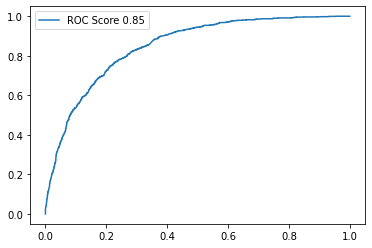

In [57]:
#### Sensitivity, specificity trade off
tpr, fpr,threshold = metrics.roc_curve(y_values["Actual"], y_values["prob"])
roc_score = round(metrics.roc_auc_score(y_values["Actual"], y_values["prob"]), 2)
plt.plot(tpr, fpr, label = "ROC Score {}".format(roc_score))
plt.legend(loc = 'best')
plt.show()

In [58]:
#### Finding optimal threshold
eval_matrix = pd.DataFrame( columns=["threshold", "sensi", "speci", "accu"])
print(eval_matrix)
index = 1
for i in range(0, 10):
    
    threshold = i/ 10
    y_train_pred = y_values.prob.apply(lambda x: 0 if x< threshold else 1) 
    confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_train_pred)
    
    ### calcualting the sensitivity and specificity of the model.
    sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
    specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])
    
    ### Getting the acuuracy of the model
    accuracy = metrics.accuracy_score(y_values["Actual"], y_train_pred)
    
    
    index +=1 
    #df = pd.DataFrame(, index = 1)
    eval_matrix =eval_matrix.append({"threshold": threshold, "sensi": sensitivity, "speci":specificity, "accu":accuracy} , ignore_index = True)

Empty DataFrame
Columns: [threshold, sensi, speci, accu]
Index: []


In [59]:
eval_matrix

,threshold,sensi,speci,accu
0,0.0,1.000000,0.000000,0.267539
1,0.1,0.944720,0.496246,0.616231
2,0.2,0.849043,0.670463,0.718240
3,0.3,0.768958,0.769609,0.769435
4,0.4,0.664068,0.837432,0.791050
5,0.5,0.556343,0.893088,0.802996
6,0.6,0.401843,0.939943,0.795980
7,0.7,0.211198,0.975149,0.770762
8,0.8,0.041814,0.997152,0.741562
9,0.9,0.000000,1.000000,0.732461


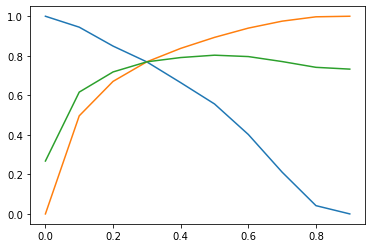

In [60]:
plt.plot(eval_matrix.threshold, eval_matrix.sensi, label = "Sensitivity")
plt.plot(eval_matrix.threshold, eval_matrix.speci, label = "Specificity")
plt.plot(eval_matrix.threshold, eval_matrix.accu, label = "Accuracy")
plt.show()

Around 0.3 we seem to find a balance between all the metrics.
Choosing 0.3 as the cutoff


In [61]:
### Making predictions on the test and train set.

y_train_pred = y_values.prob.apply(lambda x: 0 if x< 0.3 else 1) 
confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_train_pred)
    
### calcualting the sensitivity and specificity of the model.
sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])
    
### Getting the acuuracy of the model
accuracy = metrics.accuracy_score(y_values["Actual"], y_train_pred)

accuracy, sensitivity, specificity

(0.7694349639742131, 0.7689581856839122, 0.7696091120890499)

### Conclusions: 

We could see that after changing the cut-off threshold, sensitivity of the model has improved.
We got a model with a decent performance.